# 🚗 **Used Car Price Prediction & Valuation Model**
**Author:** Vinit Vijaykumar Adke
**Domain:** Automotive Pricing Strategy / Sales Forecasting

---

### 📌 **Executive Summary**
**Business Problem:** The used car market is highly volatile. Dealerships risk losing revenue by underpricing inventory or increasing holding costs by overpricing.
**Objective:** Develop a robust regression model to estimate the `Selling_Price` of vehicles based on age, mileage (`Kms_Driven`), fuel type, and seller type.

### 📊 **Methodology**
1.  **Data Preprocessing:** Handled missing values, performed One-Hot Encoding for categorical variables (`Fuel_Type`, `Transmission`), and standardized numerical features.
2.  **Modeling:**
    * **Multiple Linear Regression:** Established a baseline for interpretability.
    * **Polynomial Regression (Degree 2):** Captured non-linear relationships between vehicle age and price.
    * **LazyPredict:** Benchmarked multiple algorithms to find the optimal repressor.
3.  **Diagnostics:** Conducted rigorous statistical tests:
    * **VIF (Variance Inflation Factor):** To detect multicollinearity.
    * **Durbin-Watson:** To check for autocorrelation in residuals.
    * **Q-Q Plots:** To validate the normality assumption of errors.

### 🚀 **Key Results**
* **Best Model:** Polynomial Regression achieved the highest **R² Score**, significantly outperforming the linear baseline.
* **Key Drivers:** `Present_Price` (Original Cost) and `Year` (Vehicle Age) were the strongest predictors of resale value.
* **Business Impact:** This model enables dealerships to automate initial pricing offers, reducing manual appraisal time.

---

## Imports

In [555]:
import pandas as pd 
df = pd.read_csv("car_data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


=== Multiple Linear Regression ===
Equation: Selling_Price = (1.021 * Year) + (3.703 * Present_Price) + (-0.239 * Kms_Driven) + (-0.224 * Owner) + (1.012 * Fuel_Type_Diesel) + (0.299 * Fuel_Type_Petrol) + (-0.569 * Seller_Type_Individual) + (-0.556 * Transmission_Manual) + (4.729)
R²: 0.849
Adjusted R²: 0.844
MSE: 3.48

=== Polynomial Regression (Degree 2) ===
R²: 0.971
Adjusted R²: 0.965
MSE: 0.66

=== Exponential Regression ===
R²: 0.926



100%|███████████████████████████████████████████| 42/42 [00:01<00:00, 37.84it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 157
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 7
[LightGBM] [Info] Start training from score 4.642292
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

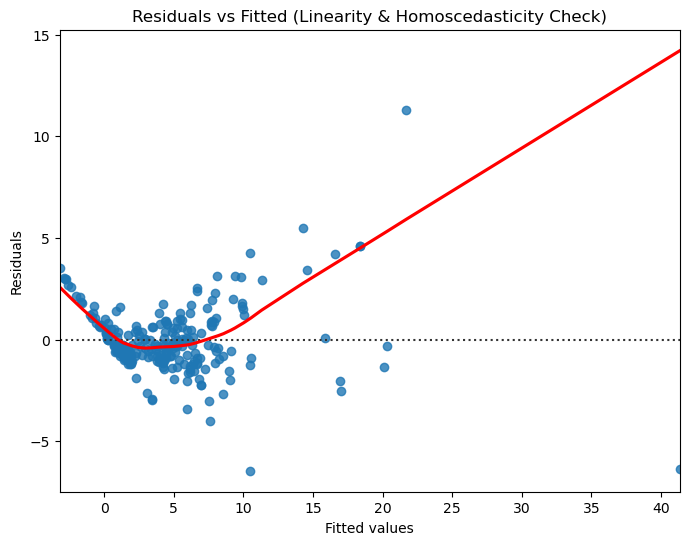

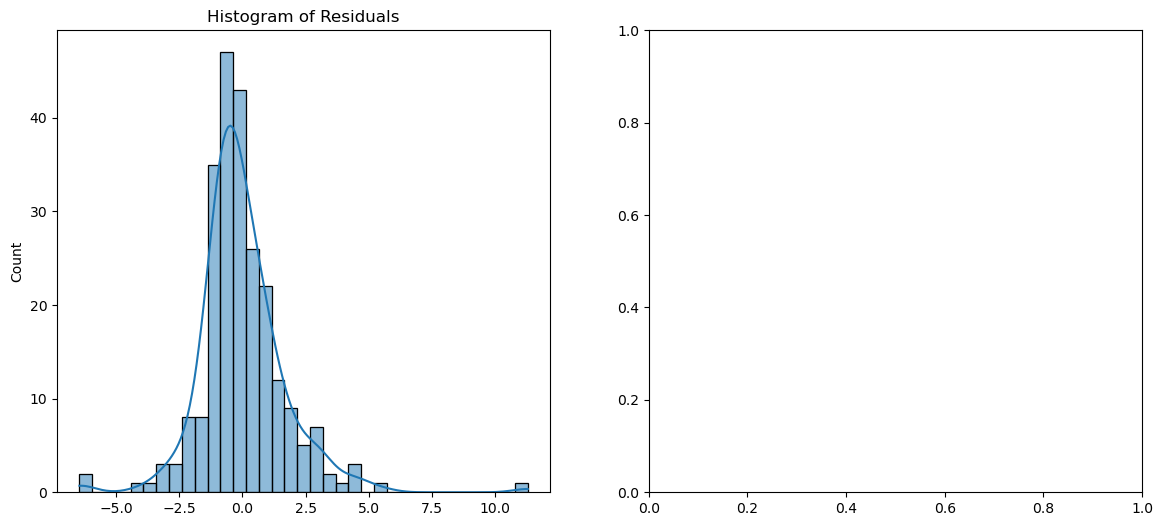

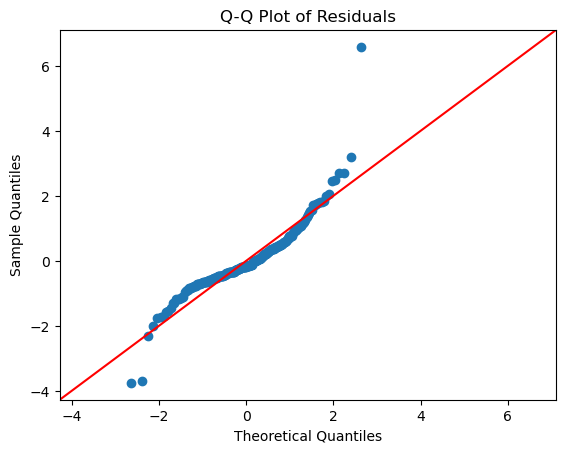

Durbin-Watson statistic: 2.2023799165012097

=== Variance Inflation Factor (VIF) ===
                  Feature   VIF
0                    Year  1.45
1           Present_Price  1.80
2              Kms_Driven  1.48
3                   Owner  1.06
4        Fuel_Type_Diesel 19.48
5        Fuel_Type_Petrol 19.30
6  Seller_Type_Individual  1.40
7     Transmission_Manual  1.19


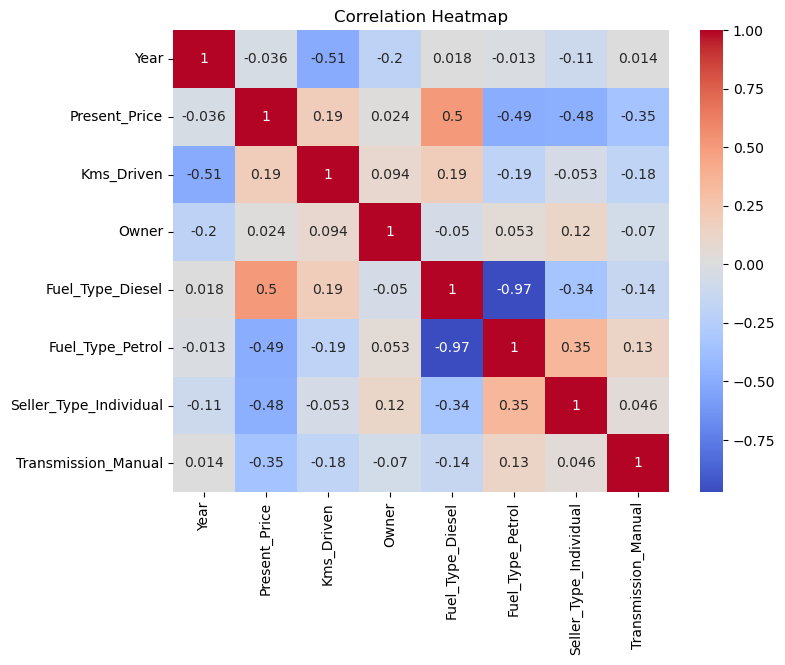


=== Descriptive Statistics ===
         Year  Present_Price  Kms_Driven  Owner
count  301.00         301.00      301.00 301.00
mean  2013.63           7.63    36947.21   0.04
std      2.89           8.64    38886.88   0.25
min   2003.00           0.32      500.00   0.00
25%   2012.00           1.20    15000.00   0.00
50%   2014.00           6.40    32000.00   0.00
75%   2016.00           9.90    48767.00   0.00
max   2018.00          92.60   500000.00   3.00


In [556]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from lazypredict.Supervised import LazyRegressor

# -------------------------------
# Load the dataset
# -------------------------------
file_path = "car_data.csv" 
df = pd.read_csv(file_path)

# -------------------------------
# Preprocessing: Handle Missing Values (if any)
# -------------------------------
numeric_cols = ["Year", "Present_Price", "Kms_Driven", "Owner"]
categorical_cols = ["Fuel_Type", "Seller_Type", "Transmission"]

num_imputer = SimpleImputer(strategy="mean")
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

cat_imputer = SimpleImputer(strategy="most_frequent")
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# One-Hot Encoding for Categorical Variables
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define independent (X) and dependent (y) variables
X = df.drop(columns=["Selling_Price", "Car_Name"])
y = df["Selling_Price"]

# Standardizing numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# -------------------------------
# Multiple Linear Regression
# -------------------------------
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Compute R² and Adjusted R²
r2_linear = r2_score(y_test, y_pred)
n, p = X_train.shape
adjusted_r2_linear = 1 - (1 - r2_linear) * (n - 1) / (n - p - 1)

# Print regression equation
coeffs = lr.coef_
equation = "Selling_Price = " + " + ".join([f"({coeffs[i]:.3f} * {X.columns[i]})" for i in range(len(coeffs))]) + f" + ({lr.intercept_:.3f})"
print("=== Multiple Linear Regression ===")
print(f"Equation: {equation}")
print(f"R²: {r2_linear:.3f}")
print(f"Adjusted R²: {adjusted_r2_linear:.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}\n")

# -------------------------------
# Polynomial Regression (Degree 2)
# -------------------------------
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_poly_train, y_train)
y_poly_pred = lr_poly.predict(X_poly_test)

# Compute R² and Adjusted R²
r2_poly = r2_score(y_test, y_poly_pred)
n_poly, p_poly = X_poly_train.shape
adjusted_r2_poly = 1 - (1 - r2_poly) * (n_poly - 1) / (n_poly - p_poly - 1)

print("=== Polynomial Regression (Degree 2) ===")
print(f"R²: {r2_poly:.3f}")
print(f"Adjusted R²: {adjusted_r2_poly:.3f}")
print(f"MSE: {mean_squared_error(y_test, y_poly_pred):.2f}\n")

# -------------------------------
# Exponential Regression (Optional)
# -------------------------------
y_train_log = np.log(y_train)
exp_model = LinearRegression()
exp_model.fit(X_train, y_train_log)
y_exp_pred = np.exp(exp_model.predict(X_test))

r2_exp = r2_score(y_test, y_exp_pred)
print("=== Exponential Regression ===")
print(f"R²: {r2_exp:.3f}\n")


#  LazyPredict: Evaluate multiple regression models
# -------------------------------
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print("=== LazyPredict Model Comparison ===")
print(models)
print()
# -------------------------------
# Diagnostic Plots & Assumptions Check
# -------------------------------
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

# Residuals & Fitted Values
residuals = model_sm.resid
fitted = model_sm.fittedvalues

plt.figure(figsize=(8, 6))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Linearity & Homoscedasticity Check)")
plt.show()

# Normality of Errors
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")

plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()


# 8.3 Independence of Errors: Durbin-Watson test statistic
dw_stat = sm.stats.stattools.durbin_watson(residuals)
print("Durbin-Watson statistic:", dw_stat)
# (A value around 2 suggests no autocorrelation.)

# -------------------------------
# Variance Inflation Factor (VIF)
# -------------------------------
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
print("\n=== Variance Inflation Factor (VIF) ===")
print(vif_data)

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(X_train, columns=X.columns).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# -------------------------------
# Boxplot for Outlier Detection
# -------------------------------
#plt.figure(figsize=(10, 6))
#sns.boxplot(data=df[numeric_cols])
#plt.title("Boxplot of Numerical Features")
#plt.xticks(rotation=45)
#plt.show()

# -------------------------------
# Descriptive Statistics
# -------------------------------
print("\n=== Descriptive Statistics ===")
print(df[numeric_cols].describe())

